<a href="https://colab.research.google.com/github/RJ-Stony/A-Complete-Guide-to-TM/blob/main/06)Finding_Topics(w_Topic_Modeling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Topic Modeling using Scikit-Learn

### Data Preparation

In [8]:
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space', 'comp.sys.ibm.pc.hardware', 'sci.crypt', 'rec.sport.baseball', 'misc.forsale']

# Fetch the train dataset
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)

print('# Train set size:', len(newsgroups_train.data))
print('# Selected categories', newsgroups_train.target_names)

# Train set size: 4401
# Selected categories ['alt.atheism', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'misc.forsale', 'rec.sport.baseball', 'sci.crypt', 'sci.space', 'talk.religion.misc']


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(token_pattern="[\w']{3,}", stop_words='english',
                     max_features=2000, min_df=5, max_df=0.5)
review_cv = cv.fit_transform(newsgroups_train.data)

### Running LDA Topic Modeling

In [10]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
np.set_printoptions(precision=3)

lda = LatentDirichletAllocation(n_components=10,      # Number of topics to extract
                                max_iter=5,
                                topic_word_prior=0.1, doc_topic_prior=1.0,
                                learning_method='online',
                                n_jobs=-1,      # Number of processors used
                                random_state=0)

review_topics = lda.fit_transform(review_cv)
print('# Shape of review_topics:', review_topics.shape)
print('# Sample of review_topics:', review_topics[0])

gross_topic_weights = np.mean(review_topics, axis=0)
print('# Sum of topic weights of documents:', gross_topic_weights)

print('# Shape of topic word distribution:', lda.components_.shape)

# Shape of review_topics: (4401, 10)
# Sample of review_topics: [0.023 0.214 0.016 0.019 0.039 0.497 0.061 0.081 0.022 0.028]
# Sum of topic weights of documents: [0.098 0.101 0.09  0.076 0.157 0.098 0.124 0.095 0.079 0.081]
# Shape of topic word distribution: (10, 2000)


In [11]:
def print_top_words(model, feature_names, n_top_words):
  for topic_idx, topic in enumerate(model.components_):
    print("Topic #%d: " % topic_idx, end='')
    print(
        ", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    )

    # In the above slicing, the last -1 means the reverse order, and in reverse order, from the beginning
    # Up to n_top_words

print_top_words(lda, cv.get_feature_names_out(), 10)

Topic #0: sale, new, posting, host, nntp, university, distribution, usa, price, good
Topic #1: university, posting, nntp, host, state, computer, thanks, distribution, david, mark
Topic #2: drive, card, dos, disk, hard, keith, video, caltech, com, drives
Topic #3: space, nasa, launch, earth, moon, research, orbit, lunar, satellite, shuttle
Topic #4: people, god, don't, think, say, just, writes, does, jesus, know
Topic #5: key, encryption, chip, clipper, government, keys, public, security, use, privacy
Topic #6: year, writes, article, game, good, just, think, team, don't, like
Topic #7: com, writes, article, access, gov, posting, net, nntp, host, ___
Topic #8: scsi, bit, ibm, ide, bus, just, i'm, article, writes, like
Topic #9: image, file, ftp, mail, available, software, graphics, files, use, internet


### Choosing the Optimal Number of Topics

n_components: 6, perplexity: 1036.185
n_components: 7, perplexity: 1021.476
n_components: 8, perplexity: 1022.833
n_components: 9, perplexity: 1018.679
n_components: 10, perplexity: 1024.586
n_components: 11, perplexity: 1030.207
n_components: 12, perplexity: 1040.419
n_components: 13, perplexity: 1046.337
n_components: 14, perplexity: 1034.144
n_components: 15, perplexity: 1039.584


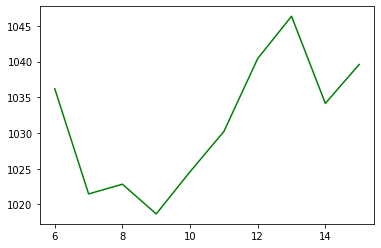

n_components with minimum perplexity: 9


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_perplexity(cv, start=10, end=30, max_iter=5, topic_word_prior=0.1, doc_topic_prior=1.0):
  iter_num = []
  per_value = []

  for i in range(start, end + 1):
    lda = LatentDirichletAllocation(n_components=i, max_iter=max_iter,
                                    topic_word_prior=topic_word_prior,
                                    doc_topic_prior=doc_topic_prior,
                                    learning_method='batch', n_jobs=-1,
                                    random_state=7)
    
    lda.fit(cv)
    iter_num.append(i)
    pv = lda.perplexity(cv)
    per_value.append(pv)
    print(f'n_components: {i}, perplexity: {pv:0.3f}')

  plt.plot(iter_num, per_value, 'g-')
  plt.show()
  return start + per_value.index(min(per_value))

print("n_components with minimum perplexity:",
      show_perplexity(review_cv, start=6, end=15))

In [13]:
lda = LatentDirichletAllocation(n_components=9,     # Specifies the number of topics to extract
                                max_iter=20,
                                topic_word_prior=0.1,
                                doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs=-1,
                                random_state=7)

review_topics = lda.fit_transform(review_cv)

print_top_words(lda, cv.get_feature_names_out(), 10)

Topic #0: com, posting, nntp, writes, article, host, reply, distribution, just, access
Topic #1: mail, sale, email, university, new, computer, list, send, internet, information
Topic #2: key, encryption, clipper, chip, government, use, public, security, keys, privacy
Topic #3: people, god, don't, say, think, does, jesus, believe, writes, christian
Topic #4: just, know, don't, it's, like, netcom, time, think, bit, good
Topic #5: drive, scsi, card, disk, hard, dos, controller, ide, bus, drives
Topic #6: space, nasa, gov, earth, launch, moon, orbit, shuttle, henry, lunar
Topic #7: year, game, university, good, article, writes, games, baseball, team, better
Topic #8: graphics, image, version, file, software, use, program, files, images, color


## Topic Modeling(w.Gensim)

### Gensim Usage and Visualization

In [14]:
pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 64.9 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

cachedStopWords = stopwords.words("english")

RegTok = RegexpTokenizer("[\w']{3,}")     # Define tokenizer with regular expression
english_stops = set(stopwords.words('english'))     # Take English Stopwords

def tokenizer(text):
  tokens = RegTok.tokenize(text.lower())
  # Except stopwords
  words = [word for word in tokens if (word not in english_stops) and len(word) > 2]
  return words

texts = [tokenizer(news) for news in newsgroups_train.data]

In [18]:
from gensim.corpora.dictionary import Dictionary

# Create a dictionary from tokenization results
dictionary = Dictionary(texts)
print('# Number of initial unique words in documents:', len(dictionary))

# Filter for words with too few or too high document frequencies and select features in order of word frequency
dictionary.filter_extremes(keep_n=2000, no_below=5, no_above=0.5)
print('# Number of unique words after removing rare and common words:', len(dictionary))

# Convert to count vector
corpus = [dictionary.doc2bow(text) for text in texts]
print('# Number of unique tokens: %d' % len(dictionary))
print('# Number of documents: %d' % len(corpus))

# Number of initial unique words in documents: 54616
# Number of unique words after removing rare and common words: 2000
# Number of unique tokens: 2000
# Number of documents: 4401


In [19]:
from gensim.models import LdaModel

num_topics = 10
passes = 5
%time model = LdaModel(corpus=corpus, id2word=dictionary,\
                       passes=passes, num_topics=num_topics, \
                       random_state=7)

CPU times: user 13.1 s, sys: 168 ms, total: 13.3 s
Wall time: 13.2 s


In [26]:
model = LdaModel(corpus=corpus, id2word=dictionary, passes=passes, num_topics=num_topics, random_state=7)

In [27]:
model.print_topics(num_words=10)

[(0,
  '0.016*"god" + 0.014*"one" + 0.012*"people" + 0.009*"say" + 0.009*"would" + 0.008*"think" + 0.008*"writes" + 0.008*"jesus" + 0.007*"christian" + 0.006*"bible"'),
 (1,
  '0.017*"university" + 0.013*"sale" + 0.012*"mail" + 0.012*"posting" + 0.011*"graphics" + 0.011*"host" + 0.011*"nntp" + 0.011*"please" + 0.009*"computer" + 0.009*"email"'),
 (2,
  '0.020*"drive" + 0.014*"com" + 0.013*"card" + 0.012*"scsi" + 0.009*"controller" + 0.009*"system" + 0.009*"disk" + 0.008*"use" + 0.008*"bus" + 0.008*"drives"'),
 (3,
  '0.065*"com" + 0.023*"writes" + 0.021*"would" + 0.021*"article" + 0.011*"netcom" + 0.010*"henry" + 0.010*"one" + 0.010*"sandvik" + 0.009*"toronto" + 0.008*"like"'),
 (4,
  '0.025*"posting" + 0.025*"host" + 0.025*"nntp" + 0.021*"writes" + 0.020*"keith" + 0.018*"article" + 0.016*"access" + 0.015*"caltech" + 0.013*"com" + 0.013*"digex"'),
 (5,
  '0.013*"year" + 0.010*"good" + 0.010*"article" + 0.010*"writes" + 0.009*"last" + 0.009*"would" + 0.009*"game" + 0.007*"think" + 0.007

In [28]:
print("# topic distribution of the first document:", model.get_document_topics(corpus)[0])

# topic distribution of the first document: [(0, 0.16144128), (3, 0.09643427), (4, 0.27894416), (5, 0.15963545), (7, 0.2980466)]


In [ ]:
pip install pyLDAvis

In [29]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# Passing the LDA model to the pyLDAvis object
lda_viz = gensimvis.prepare(model, corpus, dictionary)
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.114192 -0.127476       1        1  15.656558
8     -0.062136 -0.084633       2        1  12.831795
7      0.107591 -0.122337       3        1  12.758678
1      0.163320  0.109560       4        1  12.642748
5     -0.109757  0.000259       5        1  11.379095
2      0.088723  0.007150       6        1   9.931889
9      0.149536  0.031005       7        1   9.609020
3     -0.058519  0.003271       8        1   6.672027
4     -0.140182  0.217017       9        1   4.640458
6     -0.024384 -0.033818      10        1   3.877732, topic_info=             Term         Freq        Total Category  logprob  loglift
70            com  4008.000000  4008.000000  Default  30.0000  30.0000
203         space  1515.000000  1515.000000  Default  29.0000  29.0000
66         writes  2958.000000  2958.000000  Default  28.0000  28.0000
33            key  1412.000000  1412.000000  Default  27.0000  27.0000
532          nasa  1012.000000  1012.000000  Default  26.0000  26.0000
..            ...          ...          ...      ...      ...      ...
120  distribution    98.159677  1187.289741  Topic10  -5.0819   0.7571
44            one   120.119996  3474.554539  Topic10  -4.8800  -0.1148
115         would   104.899062  3240.223059  Topic10  -5.0155  -0.1805
568          make    91.252240  1069.020057  Topic10  -5.1549   0.7890
37           like    92.786593  2080.870696  Topic10  -5.1382   0.1397

[592 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1870      3  0.029366   1992
1870      4  0.079709   1992
1870      5  0.612497   1992
1870      7  0.209759   1992
1870      8  0.004195   1992
...     ...       ...    ...
318       7  0.158899  years
318       8  0.072356  years
318       9  0.034050  years
318      10  0.018444  years
1797      8  0.993781    zoo

[2353 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 9, 8, 2, 6, 3, 10, 4, 5, 7])

### Optimal Value Selection using Perplexity and Topic Coherence

In [30]:
from gensim.models import CoherenceModel

cm = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
coherence = cm.get_coherence()
print(coherence)

-1.8732717697987584


num_topics: 6, perplexity: -6.993, coherence: -1.517


num_topics: 7, perplexity: -6.968, coherence: -1.623


num_topics: 8, perplexity: -6.972, coherence: -1.815


num_topics: 9, perplexity: -6.956, coherence: -1.793


num_topics: 10, perplexity: -6.959, coherence: -1.747


num_topics: 11, perplexity: -6.958, coherence: -1.687


num_topics: 12, perplexity: -6.960, coherence: -1.817


num_topics: 13, perplexity: -6.976, coherence: -1.802


num_topics: 14, perplexity: -6.985, coherence: -1.928
num_topics: 15, perplexity: -6.981, coherence: -1.768


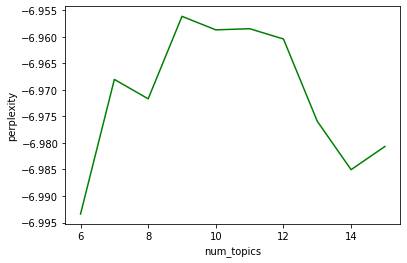

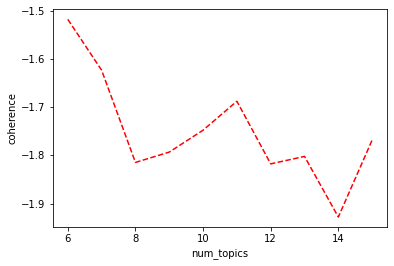

In [31]:
def show_coherence(corpus, dictionary, start=6, end=15):
  iter_num = []
  per_value = []
  coh_value = []

  for i in range(start, end + 1):
    model = LdaModel(corpus=corpus, id2word=dictionary,
                     chunksize=1000, num_topics=i,
                     random_state=7)
    iter_num.append(i)
    pv = model.log_perplexity(corpus)
    per_value.append(pv)

    cm = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
    cv = cm.get_coherence()
    coh_value.append(cv)
    print(f'num_topics: {i}, perplexity: {pv:0.3f}, coherence: {cv:0.3f}')

  plt.plot(iter_num, per_value, 'g-')
  plt.xlabel("num_topics")
  plt.ylabel("perplexity")
  plt.show()

  plt.plot(iter_num, coh_value, 'r--')
  plt.xlabel("num_topics")
  plt.ylabel("coherence")
  plt.show()

show_coherence(corpus, dictionary, start=6, end=15)

## Discover how Topics change Over time with Topic Trends

In [32]:
import pandas as pd

df = pd.read_csv("https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition_sampled.csv")
df.iloc[[2]]

,article_id,start,end,answered,votes,category,title,content
2,136,2017-08-20,2017-11-18,0,4,육아/교육,고등학교 교육 내용 수준을 낮춰주시고 실용적인 내용을 담아주세요!,저는 광주에 사는 중3 학생입니다. 고등학교 가기 직전의 학년이라 어느 때보다 고등...


In [34]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 69.6 MB/s 


In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt
twit = Okt()

def tokenizer(doc):
    return [token for token in twit.nouns(doc) if len(token) > 1]

vec = CountVectorizer(tokenizer=tokenizer,          # First, use only nouns.
                      max_df=0.5, min_df=5,
                      max_features=1000)            # Choose a suitable target word count

pet_cv = vec.fit_transform(df.content)
print(pet_cv.shape)

(18077, 1000)


In [37]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=15, \
                                n_jobs=-1, \
                                random_state=0)

%time pet_topics = lda.fit_transform(pet_cv)

pet_topics = lda.fit_transform(pet_cv)

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(", ".join([feature_names[i]
                         for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
print_top_words(lda, vec.get_feature_names_out(), 15)

CPU times: user 1.97 s, sys: 195 ms, total: 2.16 s
Wall time: 1min 58s
Topic #0: 사람, 생각, 병원, 대통령, 피해자, 국민, 사건, 정말, 가족, 나라, 환자, 자신, 인간, 지금, 의사
Topic #1: 북한, 우리, 한국, 대통령, 정부, 국민, 대한민국, 미국, 일본, 문재인, 국가, 문제, 생각, 나라, 우리나라
Topic #2: 아이, 부모, 어린이집, 생각, 교사, 엄마, 우리, 유치원, 자녀, 가정, 동물, 출산, 아빠, 문제, 지원
Topic #3: 청소년, 불법, 폐지, 보호, 장애인, 조직, 사찰, 생각, 외국인, 이용, 노인, 사회, 나이, 범죄, 사람
Topic #4: 정부, 주택, 정책, 국민, 부동산, 서민, 아파트, 나라, 대통령, 세금, 지금, 사람, 투기, 집값, 임대
Topic #5: 일자리, 기업, 근무, 정부, 생각, 근로자, 지원, 임금, 최저임금, 시간, 정책, 회사, 직원, 대기업, 고용
Topic #6: 국민, 청원, 국회의원, 국회, 의원, 청와대, 세금, 반대, 생각, 건강, 동의, 제도, 대통령, 답변, 국가
Topic #7: 관리, 내용, 대한, 조사, 관련, 판결, 공사, 사실, 업무, 판사, 확인, 해당, 주민, 발생, 민원
Topic #8: 학생, 학교, 교육, 선수, 시험, 생각, 대학, 공부, 문제, 교사, 선생님, 시간, 제도, 위해, 고등학교
Topic #9: 보험, 연금, 국민연금, 공무원, 지급, 방송, 국민, 소득, 가입, 국가, 기초, 보험료, 공단, 군인, 수급
Topic #10: 여성, 공무원, 사회, 대한민국, 생각, 남성, 사람, 남자, 행정, 국민, 나라, 여자, 의무, 군대, 국가
Topic #11: 경찰, 범죄, 국민, 사건, 위해, 대한민국, 조직, 불법, 수사, 만행, 범죄자, 경찰서, 부정부패, 검찰, 살인마
Topic #12: 처벌, 피해자, 사건, 차량, 사고, 피해, 가해자, 범죄, 경우, 대한, 기사,

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt
trend_data = pd.DataFrame(pet_topics, columns=['Topic'+str(i) for i in range(1, 16)])
trend_data = pd.concat([trend_data, df.start.map(lambda x: x[:7])], axis=1)
trend_data.iloc[:5, -5:]

,Topic12,Topic13,Topic14,Topic15,start
0,0.000307,0.000307,0.000307,0.000307,2017-08
1,0.000813,0.000813,0.000813,0.559732,2017-08
2,0.001449,0.001449,0.001449,0.001449,2017-08
3,0.000227,0.000227,0.000227,0.026129,2017-08
4,0.000447,0.035637,0.000447,0.000447,2017-08


In [39]:
trend = trend_data.groupby(['start']).mean()
trend.iloc[:5, -5:]

,Topic11,Topic12,Topic13,Topic14,Topic15
start,,,,,
2017-08,0.043216,0.015766,0.025389,0.024661,0.110004
2017-09,0.042948,0.023563,0.104047,0.019750,0.040786
2017-10,0.083816,0.053574,0.064864,0.032247,0.097858
2017-11,0.045919,0.045047,0.221295,0.045477,0.048018
2017-12,0.059587,0.027359,0.075098,0.050710,0.076128


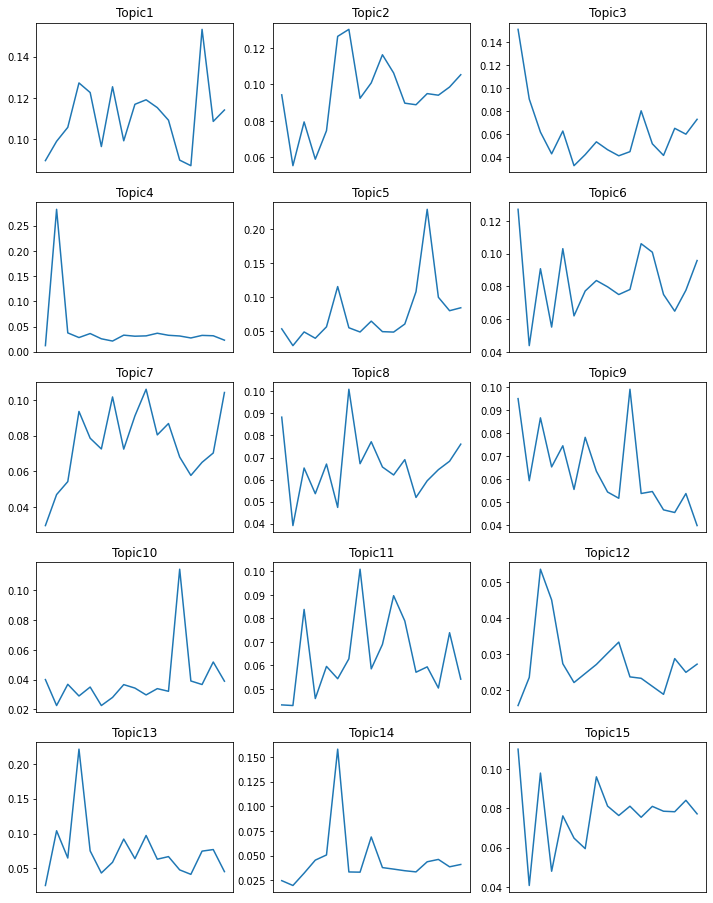

In [40]:
import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

fig, axes = plt.subplots(5, 3, sharex='col', figsize=(12, 16))
for col, ax in zip(trend.columns.tolist(), axes.ravel()):
    ax.set_title(col)
    ax.axes.xaxis.set_visible(False)
    ax.plot(trend[col])
plt.show()